# Prediction of ROP (Rate of Penetration)

# **1. Import**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Used for checking Distribution curve
from scipy.stats import skew

# **2. Read Data**

In [2]:
data = pd.read_csv('tech_challenge2021_train.csv')

# **3. Glimps Data**

In [3]:
data.sample(10)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
74233,USROP_A 3 N-SH-F-15d,1481.608,1.147589,22874.460480,8.419629,14.849856,129.660000,4408.793648,11.933929,444.50,126.343619,1443.374304,160.690
142322,USROP_A 4 N-SH_F-15Sd,2921.990,1.124909,15612.005780,11.117707,9.918192,217.410000,1794.550267,1.310000,215.90,136.422441,2598.264552,52.150
122988,USROP_A 4 N-SH_F-15Sd,1536.850,3.079543,20109.800700,13.688338,19.769328,120.000000,3987.855834,1.460000,311.15,126.057321,1488.563952,123.470
94705,USROP_A 3 N-SH-F-15d,2862.072,8.346100,13856.600570,20.513526,14.228064,139.736000,2121.382739,10.849026,215.90,128.489111,2630.096340,2.110
191146,USROP_A 6 N-SH_F-9d,225.835,0.560844,8883.999635,1.440001,3.350000,144.000000,3478.899903,1.030000,444.50,95.547406,225.827844,19.332
25737,USROP_A 2 N-SH_F-14d,1275.436,1.397011,14586.999510,9.670000,45.009998,90.300003,4155.930174,1.210000,444.50,108.977075,1274.945786,32.722
136945,USROP_A 4 N-SH_F-15Sd,2356.415,4.282808,23684.049780,18.049999,30.165751,159.639000,3987.863405,1.460000,311.15,139.945859,2199.393518,21.955
44795,USROP_A 2 N-SH_F-14d,2311.414,4.833454,23439.999390,9.439999,18.740000,44.730000,3524.479981,1.290000,311.15,142.260603,2309.502214,41.405
138791,USROP_A 4 N-SH_F-15Sd,2539.380,5.475876,24158.643500,14.630000,30.178858,159.243000,3987.863405,1.460000,215.90,140.649450,2355.560542,58.480
105221,USROP_A 3 N-SH-F-15d,3219.301,7.928795,14725.353780,27.093310,25.212446,139.736000,2077.184268,11.182843,215.90,126.430708,2833.984680,32.106


In [4]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


# **4. Exploratory Data Analysis**

In [5]:
# remove all rows that contains missing value
data.replace(['-999', -999], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


<b>The above table shows that the there is considerable difference between the values between mean and 50% percentile of the data. This shows that the data is not distributed evenly.</b>

In [6]:
#Checking for any missing or nan values
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [7]:
# Identifying the numbers of unique wells whose data has been used
wells = data['Well Identifier'].unique()
wells

array(['USROP_A 0 N-NA_F-9_Ad', 'USROP_A 1 N-S_F-7d',
       'USROP_A 2 N-SH_F-14d', 'USROP_A 3 N-SH-F-15d',
       'USROP_A 4 N-SH_F-15Sd', 'USROP_A 5 N-SH-F-5d',
       'USROP_A 6 N-SH_F-9d'], dtype=object)

In [8]:
len(wells)

7

In [9]:
data.columns.tolist()

['Well Identifier',
 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

In [10]:
data.skew(axis = 0, skipna = True)

Measured Depth m                 -0.345659
Weight on Bit kkgf                0.906045
Average Standpipe Pressure kPa   -0.129656
Average Surface Torque kN.m       0.529987
Rate of Penetration m/h           0.998834
Average Rotary Speed rpm          0.457813
Mud Flow In L/min                 0.322860
Mud Density In g/cm3              1.062461
Diameter mm                       0.626293
Average Hookload kkgf            -1.118999
Hole Depth (TVD) m               -0.690687
USROP Gamma gAPI                  0.903386
dtype: float64

<b>Skewness of the data shows us that Data Distribution Curve is not properly distributed.</b>

## Visualizing Data Distribution Curve

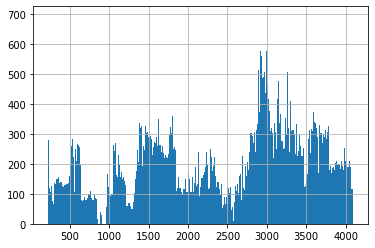

In [11]:
data['Measured Depth m'].hist(bins = 1000)

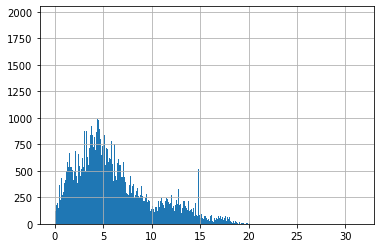

In [12]:
data['Weight on Bit kkgf'].hist(bins = 1000)

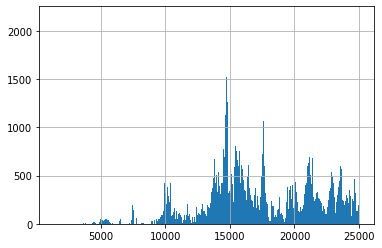

In [13]:
data['Average Standpipe Pressure kPa'].hist(bins = 1000)

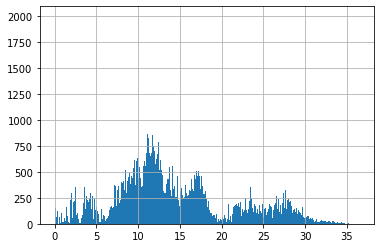

In [14]:
data['Average Surface Torque kN.m'].hist(bins = 1000)

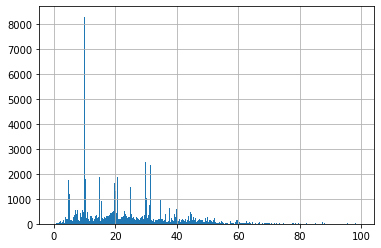

In [15]:
data['Rate of Penetration m/h'].hist(bins = 1000)

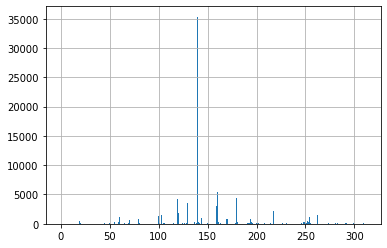

In [16]:
data['Average Rotary Speed rpm'].hist(bins = 1000)

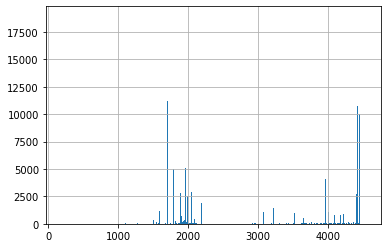

In [17]:
data['Mud Flow In L/min'].hist(bins = 1000)

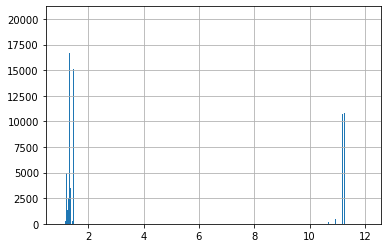

In [18]:
data['Mud Density In g/cm3'].hist(bins = 1000)

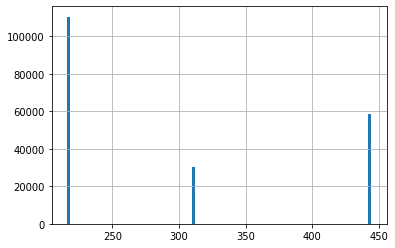

In [19]:
data['Diameter mm'].hist(bins = 100)

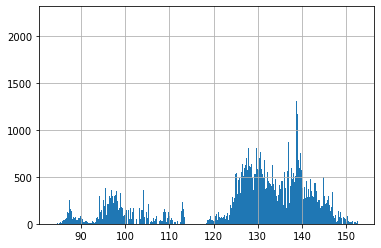

In [20]:
data['Average Hookload kkgf'].hist(bins = 1000)

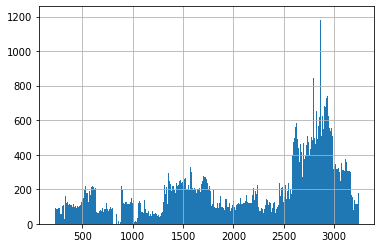

In [21]:
data['Hole Depth (TVD) m'].hist(bins = 1000)

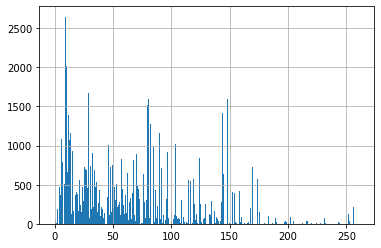

In [22]:
data['USROP Gamma gAPI'].hist(bins = 1000)

## Data Scaling
<b>This brings us to the possibility of using different scalers to scale our data.</b>
<ol>
    <li>StandardScaler</li>
    <li>MinMaxScaler</li>
    <li>MaxAbsScaler</li>
    <li>RobustScaler</li>
    <li>Quartile Transformer</li>
    <li>PowerTransformer (Yeo-Johnson and Box-Cox)</li>
</ol>

<b>We eliminate the use of RobustScaler and QuartileTransformer since they balance out data by adding or removing outliers which may affect our data and the relation between our columns since ROP is highly variable.</b>

<b>We also rule out the use of Box-Cox Power Transformer since our data rows has 0 values on which Box-Cox won't work.</b>

This leaves us with possible transforms -
<ol>
    <li>StandardScaler</li>
    <li>MinMaxScaler</li>
    <li>MaxAbsScaler</li>
    <li>PowerTransformer (Yeo-Johnson)</li>
</ol>